# Module

In [1]:
import os 
import time
import platform 
import datetime 

import numpy as np 
import pandas as pd
import seaborn as sns 
from itertools import cycle

from termcolor import colored as cl 
from mpl_toolkits.mplot3d import Axes3D
from typing import collections, List, Tuple

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.preprocessing import StandardScaler

# 폰트 깨지지 않게 하는 것 
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# Data 

In [2]:
os.chdir("C:/Users/user/OneDrive - 서울과학기술대학교/바탕 화면/code blue/전자제조팀프로젝트/dataset")
df = pd.read_excel("./pp_data.xlsx", engine="openpyxl")
error = pd.read_excel("./Press_error.xlsx", engine="openpyxl")

del df["Unnamed: 0"]

new_data = df[["Pressure 1", "Pressure 2"]]
new_data2 = new_data.copy()

data_scaled = StandardScaler().fit_transform(new_data)

# MeanShift

In [5]:
def get_ms(number: int, data: List[float] ) -> None:
    start = time.time()
    ms = MeanShift(
                bandwidth=number,
                n_jobs=-1,
                max_iter=300,
                bin_seeding=True)
    cluster_labels = ms.fit_predict(data)
    end= time.time()
    print('소요시간 : ', round(end-start, 2))
    print('cluster labels 유형 : ', np.unique(cluster_labels))
    if len(np.unique(cluster_labels)) == 4:
        print(ms.get_params())

    print('-' * 30)
    print()

## 최적 하이퍼파라미터 

In [6]:
for i in range(1, 31):
    get_ms(i, data_scaled)

소요시간 :  3.95
cluster labels 유형 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
------------------------------

소요시간 :  0.98
cluster labels 유형 :  [0 1 2 3 4 5 6 7 8]
------------------------------

소요시간 :  0.9
cluster labels 유형 :  [0 1 2 3 4 5 6]
------------------------------

소요시간 :  0.83
cluster labels 유형 :  [0 1 2 3 4 5]
------------------------------

소요시간 :  0.78
cluster labels 유형 :  [0 1 2 3]
{'bandwidth': 5, 'bin_seeding': True, 'cluster_all': True, 'max_iter': 300, 'min_bin_freq': 1, 'n_jobs': -1, 'seeds': None}
------------------------------

소요시간 :  0.78
cluster labels 유형 :  [0 1 2]
------------------------------

소요시간 :  0.75
cluster labels 유형 :  [0 1 2]
------------------------------

소요시간 :  0.71
cluster labels 유형 :  [0 1]
------------------------------

소요시간 :  0.71
cluster labels 유형 :  [0 1]
------------------------------

소요시간 :  0.72
cluster labels 유형 :  [0 1]
------------------------------

소요시간 :  0.72
cluster labels 유형 :  [0 1]
------------------------------

소요시간 :  0.

## 최적 bandwidth

time :  0.76
number of estimated clusters : 4
cluster labels 유형 :  [0 1 2 3]
HyperParameters :  {'bandwidth': 5, 'bin_seeding': True, 'cluster_all': True, 'max_iter': 300, 'min_bin_freq': 1, 'n_jobs': -1, 'seeds': None}
------------------------------------------------------------



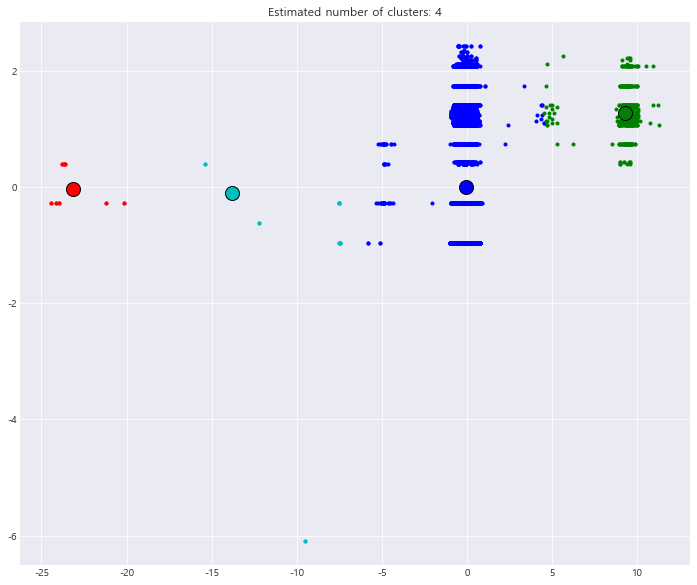

In [7]:
start = time.time()
ms = MeanShift(
            bandwidth=5,
            n_jobs=-1,
            max_iter=300,
            bin_seeding=True)
cluster_labels = ms.fit_predict(data_scaled)

cluster_centers = ms.cluster_centers_
labels = ms.labels_
labels_unique = np.unique(cluster_labels)
n_clusters = len(labels_unique
)
end= time.time()
print('time : ', round(end-start, 2))
print('number of estimated clusters : %d' % n_clusters)
print('cluster labels 유형 : ', labels_unique)
print('HyperParameters : ', ms.get_params())
print('-' * 60)
print()

# ########################################################################
# Plot result 

plt.figure(figsize=(12,10))
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(data_scaled[my_members, 0], data_scaled[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

# 실루엣 스코어 

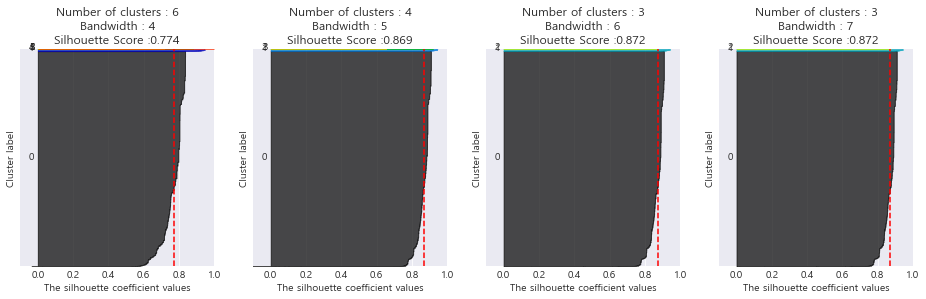

In [8]:
def visualize_silhouette(bandwidth_list: List[int], X_features: List[float]) -> None:
    
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    from sklearn.metrics import silhouette_samples, silhouette_score
    
    n_cols = len(bandwidth_list)

    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)
    
    for ind, bandwidth in enumerate(bandwidth_list):
        ms = MeanShift(
                    bandwidth=bandwidth,
                    n_jobs=-1,
                    max_iter=300,
                    bin_seeding=True)
        cluster_labels = ms.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        cluster_count = len(np.unique(cluster_labels))
        
        axs[ind].set_title('Number of clusters : '+ str(len(np.unique(cluster_labels)))+'\n' \
                           'Bandwidth : ' + str(bandwidth) + '\n' \
                            'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (bandwidth + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        

        for i in range(cluster_count):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / cluster_count) # 이게 어떤 기능인지 모르겠음 
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                  facecolor = color, edgecolor = color, alpha = 0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
    
b_list = range(4, 8)

visualize_silhouette(b_list, data_scaled)

# 시각화 - 파이차트 

In [9]:
ms = MeanShift(
            bandwidth=5,
            n_jobs=-1,
            max_iter=300,
            bin_seeding=True)
cluster_labels = ms.fit_predict(data_scaled)


In [14]:
clu_data = pd.DataFrame(np.hstack((data_scaled, np.array([cluster_labels]).T)), \
                            columns=["Pressure 1", "Pressure 2", "cluster_label"])
clu_data = clu_data.astype({"cluster_label" : "int"})
clu_data.head()

,Pressure 1,Pressure 2,cluster_label
0,-0.065094,1.403449,0
1,-0.065094,1.403449,0
2,-0.065094,1.740766,0
3,-0.065094,1.740766,0
4,-0.447615,2.078082,0


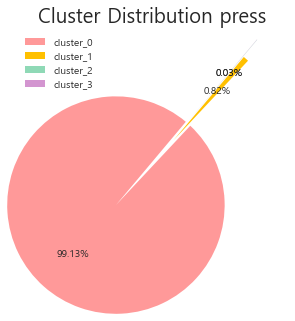

In [56]:
label_name = []
sizes = []
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
explode = [0.5, 0.3, 0.5, 0.5]

for i in np.unique(cluster_labels).tolist():
    label_name.append("cluster_" + str(i))
    sizes.append(collections.Counter(clu_data["cluster_label"])[i])
    
plt.figure(figsize=(10,5))
plt.pie(sizes,shadow=False,startangle=50,autopct='%1.2f%%',colors=colors,explode=explode)
plt.title("Cluster Distribution press",position=(0.5,1.2),fontsize=20)
plt.legend(label_name)
plt.show()

In [98]:
pd.DataFrame(clu_data["cluster_label"].value_counts())

,cluster_label
0,62178
1,515
2,16
3,16


In [74]:
collections.Counter(clu_data["cluster_label"]).items()

dict_items([(0, 62178), (2, 16), (3, 16), (1, 515)])

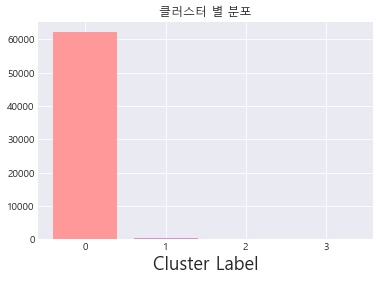

In [97]:
index = []
values = []
for key, val in collections.Counter(clu_data["cluster_label"]).items():
    index.append(key)
    values.append(val)

plt.bar(index, values, color = colors)    
plt.title("클러스터 별 분포")
plt.xlabel("Cluster Label", fontsize=18)
plt.xticks(index)
plt.show()

In [21]:
clu_data.groupby(["cluster_label"]).mean()

,Pressure 1,Pressure 2
cluster_label,,
0,-0.068925,-0.010223
1,9.329506,1.273042
2,-23.123927,-0.030146
3,-9.317316,-1.219186


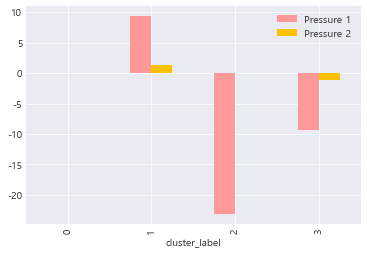

<Figure size 864x576 with 0 Axes>

In [34]:
clu_data_mean = clu_data.groupby(["cluster_label"]).mean()
clu_data_mean.plot.bar(color = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'])
plt.figure(figsize=(12,8))
plt.show()

<AxesSubplot:>

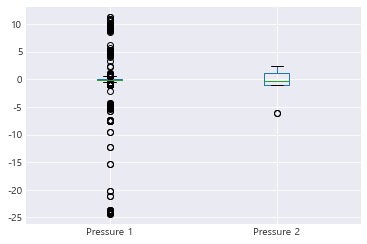

In [32]:
clu_data[["Pressure 1", "Pressure 2"]].plot(kind="box")